## Define the Convolutional Neural Network

After you've looked at the data you're working with and, in this case, know the shapes of the images and of the keypoints, you are ready to define a convolutional neural network that can *learn* from this data.

In this notebook and in `models.py`, you will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. And you'll see examples of this later in the notebook.

---


## CNN Architecture

Recall that CNN's are defined by a few types of layers:
* Convolutional layers
* Maxpooling layers
* Fully-connected layers

You are required to use the above layers and encouraged to add multiple convolutional layers and things like dropout layers that may prevent overfitting. You are also encouraged to look at literature on keypoint detection, such as [this paper](https://arxiv.org/pdf/1710.00977.pdf), to help you determine the structure of your network.


### TODO: Define your model in the provided file `models.py` file

This file is mostly empty but contains the expected name and some TODO's for creating your model.

---

## PyTorch Neural Nets

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)      
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

Best practice is to place any layers whose weights will change during the training process in `__init__` and refer to them in the `forward` function; any layers or functions that always behave in the same way, such as a pre-defined activation function, should appear *only* in the `forward` function.

#### Why models.py

You are tasked with defining the network in the `models.py` file so that any models you define can be saved and loaded by name in different notebooks in this project directory. For example, by defining a CNN class called `Net` in `models.py`, you can then create that same architecture in this and other notebooks by simply importing the class and instantiating a model:
```
    from models import Net
    net = Net()
```

In [1]:
# load the data if you need to; if you have already loaded the data, you may comment this cell out
# -- DO NOT CHANGE THIS CELL -- #
!mkdir /data
!wget -P /data/ https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
!unzip -n /data/train-test-data.zip -d /data

--2020-01-10 15:50:42--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.171.157
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.171.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338613624 (323M) [application/zip]
Saving to: ‘/data/train-test-data.zip’

train-test-data.zip 100%[===================>] 322.93M  66.4MB/s    in 5.0s    

2020-01-10 15:50:47 (65.1 MB/s) - ‘/data/train-test-data.zip’ saved [338613624/338613624]

Archive:  /data/train-test-data.zip
   creating: /data/test/
  inflating: /data/test/Abdel_Aziz_Al-Hakim_00.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_01.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_10.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_11.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_40.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_41.jpg  
  inflating: /data/test/Abdullah_Gul_

<div class="alert alert-info">**Note:** Workspaces automatically close connections after 30 minutes of inactivity (including inactivity while training!). Use the code snippet below to keep your workspace alive during training. (The active_session context manager is imported below.)
</div>
``` from workspace_utils import active_session

with active_session():
    train_model(num_epochs) ```


In [2]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# import utilities to keep workspaces alive during model training
from workspace_utils import active_session

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

In [3]:
## TODO: Define the Net in models.py

import torch
import torch.nn as nn
import torch.nn.functional as F

## TODO: Once you've define the network, you can instantiate it
# one example conv layer has been provided for you
from models import Net

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(256, 512, kernel_size=(1, 1), stride=(1, 1))
  (pool5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=18432, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=136, bias=True)
  (d

## Transform the dataset 

To prepare for training, create a transformed dataset of images and keypoints.

### TODO: Define a data transform

In PyTorch, a convolutional neural network expects a torch image of a consistent size as input. For efficient training, and so your model's loss does not blow up during training, it is also suggested that you normalize the input images and keypoints. The necessary transforms have been defined in `data_load.py` and you **do not** need to modify these; take a look at this file (you'll see the same transforms that were defined and applied in Notebook 1).

To define the data transform below, use a [composition](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms) of:
1. Rescaling and/or cropping the data, such that you are left with a square image (the suggested size is 224x224px)
2. Normalizing the images and keypoints; turning each RGB image into a grayscale image with a color range of [0, 1] and transforming the given keypoints into a range of [-1, 1]
3. Turning these images and keypoints into Tensors

These transformations have been defined in `data_load.py`, but it's up to you to call them and create a `data_transform` below. **This transform will be applied to the training data and, later, the test data**. It will change how you go about displaying these images and keypoints, but these steps are essential for efficient training.

As a note, should you want to perform data augmentation (which is optional in this project), and randomly rotate or shift these images, a square image size will be useful; rotating a 224x224 image by 90 degrees will result in the same shape of output.

In [4]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
from data_load import FacialKeypointsDataset
# the transforms we defined in Notebook 1 are in the helper file `data_load.py`
from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop

#rescale = Rescale(100)
#crop = RandomCrop(50)

data_transform = transforms.Compose([Rescale(250),
                               RandomCrop(224),
                               Normalize(),
                               ToTensor()])

# testing that you've defined a transform
assert(data_transform is not None), 'Define a data_transform'

In [5]:
# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='/data/training_frames_keypoints.csv',
                                             root_dir='/data/training/',
                                             transform=data_transform)


print('Number of images: ', len(transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. You can read more about the parameters of the DataLoader, in [this documentation](http://pytorch.org/docs/master/data.html).

#### Batch size
Decide on a good batch size for training your model. Try both small and large batch sizes and note how the loss decreases as the model trains. Too large a batch size may cause your model to crash and/or run out of memory while training.

**Note for Windows users**: Please change the `num_workers` to 0 or you may face some issues with your DataLoader failing.

In [6]:
# load training data in batches
batch_size = 10

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)


## Before training

Take a look at how this model performs before it trains. You should see that the keypoints it predicts start off in one spot and don't match the keypoints on a face at all! It's interesting to visualize this behavior so that you can compare it to the model after training and see how the model has improved.

#### Load in the test dataset

The test dataset is one that this model has *not* seen before, meaning it has not trained with these images. We'll load in this test data and before and after training, see how your model performs on this set!

To visualize this test data, we have to go through some un-transformation steps to turn our images into python images from tensors and to turn our keypoints back into a recognizable range. 

In [7]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
test_dataset = FacialKeypointsDataset(csv_file='/data/test_frames_keypoints.csv',
                                             root_dir='/data/test/',
                                             transform=data_transform)

In [8]:
# load test data in batches
batch_size = 10

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)

## Apply the model on a test sample

To test the model on a test sample of data, you have to follow these steps:
1. Extract the image and ground truth keypoints from a sample
2. Wrap the image in a Variable, so that the net can process it as input and track how it changes as the image moves through the network.
3. Make sure the image is a FloatTensor, which the model expects.
4. Forward pass the image through the net to get the predicted, output keypoints.

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [9]:
# test the model on a batch of test images

def net_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']

        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts
            

#### Debugging tips

If you get a size or dimension error here, make sure that your network outputs the expected number of keypoints! Or if you get a Tensor type error, look into changing the above code that casts the data into float types: `images = images.type(torch.FloatTensor)`.

In [10]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


## Visualize the predicted keypoints

Once we've had the model produce some predicted output keypoints, we can visualize these points in a way that's similar to how we've displayed this data before, only this time, we have to "un-transform" the image/keypoint data to display it.

Note that I've defined a *new* function, `show_all_keypoints` that displays a grayscale image, its predicted keypoints and its ground truth keypoints (if provided).

In [11]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')


#### Un-transformation

Next, you'll see a helper function. `visualize_output` that takes in a batch of images, predicted keypoints, and ground truth keypoints and displays a set of those images and their true/predicted keypoints.

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform; it's assumed that you applied these transformations when you loaded your test data.

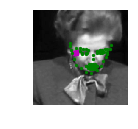

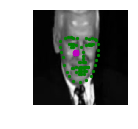

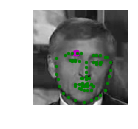

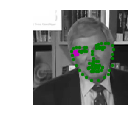

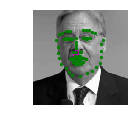

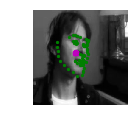

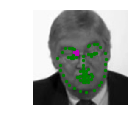

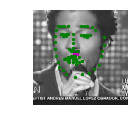

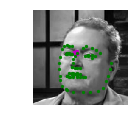

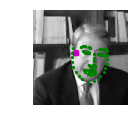

In [12]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):

    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's Variable wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

## Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](http://pytorch.org/docs/master/_modules/torch/nn/modules/loss.html).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [13]:
## TODO: Define the loss and optimization
import torch.optim as optim

criterion = nn.SmoothL1Loss()

optimizer = optim.Adam(net.parameters(), lr=0.001)


## Training and Initial Observation

Now, you'll train on your batched training data from `train_loader` for a number of epochs. 

To quickly observe how your model is training and decide on whether or not you should modify it's structure or hyperparameters, you're encouraged to start off with just one or two epochs at first. As you train, note how your the model's loss behaves over time: does it decrease quickly at first and then slow down? Does it take a while to decrease in the first place? What happens if you change the batch size of your training data or modify your loss function? etc. 

Use these initial observations to make changes to your model and decide on the best architecture before you train for many epochs and create a final model.

In [14]:
def train_net(n_epochs):

    # prepare the net for training
    net.train()

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            running_loss += loss.item()
            if batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/10))
                running_loss = 0.0

    print('Finished Training')


In [15]:
# train your network
n_epochs = 20 # start small, and increase when you've decided on your model structure and hyperparams

# this is a Workspaces-specific context manager to keep the connection
# alive while training your model, not part of pytorch
with active_session():
    train_net(n_epochs)

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 1, Batch: 10, Avg. Loss: 0.16922141313552858
Epoch: 1, Batch: 20, Avg. Loss: 0.12097151726484298
Epoch: 1, Batch: 30, Avg. Loss: 0.09535738863050938
Epoch: 1, Batch: 40, Avg. Loss: 0.09901236817240715
Epoch: 1, Batch: 50, Avg. Loss: 0.12144536636769772
Epoch: 1, Batch: 60, Avg. Loss: 0.09023559466004372
Epoch: 1, Batch: 70, Avg. Loss: 0.09297814592719078
Epoch: 1, Batch: 80, Avg. Loss: 0.12175077795982361
Epoch: 1, Batch: 90, Avg. Loss: 0.12375959232449532
Epoch: 1, Batch: 100, Avg. Loss: 0.09546880796551704
Epoch: 1, Batch: 110, Avg. Loss: 0.08155399039387703
Epoch: 1, Batch: 120, Avg. Loss: 0.08612026013433934
Epoch: 1, Batch: 130, Avg. Loss: 0.103373172134161
Epoch: 1, Batch: 140, Avg. Loss: 0.1029101338237524
Epoch: 1, Batch: 150, Avg. Loss: 0.09547918140888215
Epoch: 1, Batch: 160, Avg. Loss: 0.09724204540252686
Epoch: 1, Batch: 170, Avg. Loss: 0.11482983008027077
Epoch: 1, Batch: 180, Avg. Loss: 0.08365503400564193
Epoch: 1, Batch: 190, Avg. Loss: 0.09649030789732933
Epoch

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 2, Batch: 10, Avg. Loss: 0.10561971701681613
Epoch: 2, Batch: 20, Avg. Loss: 0.07601286433637142
Epoch: 2, Batch: 30, Avg. Loss: 0.09013587012887
Epoch: 2, Batch: 40, Avg. Loss: 0.0822492215782404
Epoch: 2, Batch: 50, Avg. Loss: 0.10422193184494973
Epoch: 2, Batch: 60, Avg. Loss: 0.09458894208073616
Epoch: 2, Batch: 70, Avg. Loss: 0.09571972452104091
Epoch: 2, Batch: 80, Avg. Loss: 0.11783412247896194
Epoch: 2, Batch: 90, Avg. Loss: 0.08531380370259285
Epoch: 2, Batch: 100, Avg. Loss: 0.08464101999998093
Epoch: 2, Batch: 110, Avg. Loss: 0.08579401448369026
Epoch: 2, Batch: 120, Avg. Loss: 0.09079749174416066
Epoch: 2, Batch: 130, Avg. Loss: 0.09081874676048755
Epoch: 2, Batch: 140, Avg. Loss: 0.09814019203186035
Epoch: 2, Batch: 150, Avg. Loss: 0.0809261653572321
Epoch: 2, Batch: 160, Avg. Loss: 0.10781197100877762
Epoch: 2, Batch: 170, Avg. Loss: 0.09906622841954231
Epoch: 2, Batch: 180, Avg. Loss: 0.06891992762684822
Epoch: 2, Batch: 190, Avg. Loss: 0.08634326308965683
Epoch: 

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 3, Batch: 10, Avg. Loss: 0.09641020260751247
Epoch: 3, Batch: 20, Avg. Loss: 0.0864695280790329
Epoch: 3, Batch: 30, Avg. Loss: 0.09849033802747727
Epoch: 3, Batch: 40, Avg. Loss: 0.0882615439593792
Epoch: 3, Batch: 50, Avg. Loss: 0.1278565526008606
Epoch: 3, Batch: 60, Avg. Loss: 0.08982112929224968
Epoch: 3, Batch: 70, Avg. Loss: 0.08875037096440792
Epoch: 3, Batch: 80, Avg. Loss: 0.09196162037551403
Epoch: 3, Batch: 90, Avg. Loss: 0.09392362907528877
Epoch: 3, Batch: 100, Avg. Loss: 0.1036900069564581
Epoch: 3, Batch: 110, Avg. Loss: 0.1129986122250557
Epoch: 3, Batch: 120, Avg. Loss: 0.08632390722632408
Epoch: 3, Batch: 130, Avg. Loss: 0.0980379931628704
Epoch: 3, Batch: 140, Avg. Loss: 0.07083264030516148
Epoch: 3, Batch: 150, Avg. Loss: 0.08895758315920829
Epoch: 3, Batch: 160, Avg. Loss: 0.08380848467350006
Epoch: 3, Batch: 170, Avg. Loss: 0.09032077491283416
Epoch: 3, Batch: 180, Avg. Loss: 0.08048532828688622
Epoch: 3, Batch: 190, Avg. Loss: 0.08589530885219573
Epoch: 3

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 4, Batch: 10, Avg. Loss: 0.115124536678195
Epoch: 4, Batch: 20, Avg. Loss: 0.09737361893057823
Epoch: 4, Batch: 30, Avg. Loss: 0.11536041051149368
Epoch: 4, Batch: 40, Avg. Loss: 0.08791518025100231
Epoch: 4, Batch: 50, Avg. Loss: 0.10029306821525097
Epoch: 4, Batch: 60, Avg. Loss: 0.10186063572764396
Epoch: 4, Batch: 70, Avg. Loss: 0.14123431369662284
Epoch: 4, Batch: 80, Avg. Loss: 0.09009923227131367
Epoch: 4, Batch: 90, Avg. Loss: 0.06647407300770283
Epoch: 4, Batch: 100, Avg. Loss: 0.09717978462576866
Epoch: 4, Batch: 110, Avg. Loss: 0.08641550987958908
Epoch: 4, Batch: 120, Avg. Loss: 0.09001130722463131
Epoch: 4, Batch: 130, Avg. Loss: 0.08884420990943909
Epoch: 4, Batch: 140, Avg. Loss: 0.08133365511894226
Epoch: 4, Batch: 150, Avg. Loss: 0.09141330868005752
Epoch: 4, Batch: 160, Avg. Loss: 0.09113646224141121
Epoch: 4, Batch: 170, Avg. Loss: 0.0681042332202196
Epoch: 4, Batch: 180, Avg. Loss: 0.08834594115614891
Epoch: 4, Batch: 190, Avg. Loss: 0.07922216057777405
Epoch

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 5, Batch: 10, Avg. Loss: 0.09028210304677486
Epoch: 5, Batch: 20, Avg. Loss: 0.10469926744699479
Epoch: 5, Batch: 30, Avg. Loss: 0.08522577546536922
Epoch: 5, Batch: 40, Avg. Loss: 0.09876235574483871
Epoch: 5, Batch: 50, Avg. Loss: 0.08146195784211159
Epoch: 5, Batch: 60, Avg. Loss: 0.09862985052168369
Epoch: 5, Batch: 70, Avg. Loss: 0.09346968494355679
Epoch: 5, Batch: 80, Avg. Loss: 0.09656041115522385
Epoch: 5, Batch: 90, Avg. Loss: 0.10001386143267155
Epoch: 5, Batch: 100, Avg. Loss: 0.07402253933250905
Epoch: 5, Batch: 110, Avg. Loss: 0.0881585095077753
Epoch: 5, Batch: 120, Avg. Loss: 0.08572768382728099
Epoch: 5, Batch: 130, Avg. Loss: 0.08351029008626938
Epoch: 5, Batch: 140, Avg. Loss: 0.08134557195007801
Epoch: 5, Batch: 150, Avg. Loss: 0.11943352892994881
Epoch: 5, Batch: 160, Avg. Loss: 0.07827979139983654
Epoch: 5, Batch: 170, Avg. Loss: 0.07885160595178604
Epoch: 5, Batch: 180, Avg. Loss: 0.08403180241584778
Epoch: 5, Batch: 190, Avg. Loss: 0.07940426282584667
Epo

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 6, Batch: 10, Avg. Loss: 0.06765016540884972
Epoch: 6, Batch: 20, Avg. Loss: 0.08627362139523029
Epoch: 6, Batch: 30, Avg. Loss: 0.09637283496558666
Epoch: 6, Batch: 40, Avg. Loss: 0.10161469914019108
Epoch: 6, Batch: 50, Avg. Loss: 0.1050184890627861
Epoch: 6, Batch: 60, Avg. Loss: 0.09128893576562405
Epoch: 6, Batch: 70, Avg. Loss: 0.07898940518498421
Epoch: 6, Batch: 80, Avg. Loss: 0.09710782170295715
Epoch: 6, Batch: 90, Avg. Loss: 0.09668330177664756
Epoch: 6, Batch: 100, Avg. Loss: 0.09381355047225952
Epoch: 6, Batch: 110, Avg. Loss: 0.08769213072955609
Epoch: 6, Batch: 120, Avg. Loss: 0.08228146098554134
Epoch: 6, Batch: 130, Avg. Loss: 0.1117532879114151
Epoch: 6, Batch: 140, Avg. Loss: 0.09379086457192898
Epoch: 6, Batch: 150, Avg. Loss: 0.09989448077976704
Epoch: 6, Batch: 160, Avg. Loss: 0.09542337656021119
Epoch: 6, Batch: 170, Avg. Loss: 0.10773218534886837
Epoch: 6, Batch: 180, Avg. Loss: 0.07232208400964737
Epoch: 6, Batch: 190, Avg. Loss: 0.07724801935255528
Epoc

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 7, Batch: 10, Avg. Loss: 0.09438838511705398
Epoch: 7, Batch: 20, Avg. Loss: 0.11612445786595345
Epoch: 7, Batch: 30, Avg. Loss: 0.09606780260801315
Epoch: 7, Batch: 40, Avg. Loss: 0.10211466066539288
Epoch: 7, Batch: 50, Avg. Loss: 0.08351887464523315
Epoch: 7, Batch: 60, Avg. Loss: 0.0821303065866232
Epoch: 7, Batch: 70, Avg. Loss: 0.09108446054160595
Epoch: 7, Batch: 80, Avg. Loss: 0.08926436491310596
Epoch: 7, Batch: 90, Avg. Loss: 0.08495429567992688
Epoch: 7, Batch: 100, Avg. Loss: 0.08168787434697151
Epoch: 7, Batch: 110, Avg. Loss: 0.07285136245191097
Epoch: 7, Batch: 120, Avg. Loss: 0.08132106922566891
Epoch: 7, Batch: 130, Avg. Loss: 0.08416842594742775
Epoch: 7, Batch: 140, Avg. Loss: 0.07481973059475422
Epoch: 7, Batch: 150, Avg. Loss: 0.09421943165361882
Epoch: 7, Batch: 160, Avg. Loss: 0.09576577804982662
Epoch: 7, Batch: 170, Avg. Loss: 0.11577864363789558
Epoch: 7, Batch: 180, Avg. Loss: 0.07679609097540378
Epoch: 7, Batch: 190, Avg. Loss: 0.0821728315204382
Epoc

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 8, Batch: 10, Avg. Loss: 0.08494115918874741
Epoch: 8, Batch: 20, Avg. Loss: 0.1049173291772604
Epoch: 8, Batch: 30, Avg. Loss: 0.0800769604742527
Epoch: 8, Batch: 40, Avg. Loss: 0.07646364085376263
Epoch: 8, Batch: 50, Avg. Loss: 0.07813941612839699
Epoch: 8, Batch: 60, Avg. Loss: 0.10600837245583535
Epoch: 8, Batch: 70, Avg. Loss: 0.08249311596155166
Epoch: 8, Batch: 80, Avg. Loss: 0.09338860549032688
Epoch: 8, Batch: 90, Avg. Loss: 0.0906270682811737
Epoch: 8, Batch: 100, Avg. Loss: 0.07199506685137749
Epoch: 8, Batch: 110, Avg. Loss: 0.0752378698438406
Epoch: 8, Batch: 120, Avg. Loss: 0.07243982106447219
Epoch: 8, Batch: 130, Avg. Loss: 0.10216745622456073
Epoch: 8, Batch: 140, Avg. Loss: 0.10560092590749263
Epoch: 8, Batch: 150, Avg. Loss: 0.09228029511868954
Epoch: 8, Batch: 160, Avg. Loss: 0.1125141803175211
Epoch: 8, Batch: 170, Avg. Loss: 0.10590862557291984
Epoch: 8, Batch: 180, Avg. Loss: 0.08295034058392048
Epoch: 8, Batch: 190, Avg. Loss: 0.08127392046153545
Epoch: 

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 9, Batch: 10, Avg. Loss: 0.09486598819494248
Epoch: 9, Batch: 20, Avg. Loss: 0.08727234899997711
Epoch: 9, Batch: 30, Avg. Loss: 0.09534276649355888
Epoch: 9, Batch: 40, Avg. Loss: 0.08909508772194386
Epoch: 9, Batch: 50, Avg. Loss: 0.09011940248310565
Epoch: 9, Batch: 60, Avg. Loss: 0.09463218562304973
Epoch: 9, Batch: 70, Avg. Loss: 0.08071545474231243
Epoch: 9, Batch: 80, Avg. Loss: 0.11136479452252387
Epoch: 9, Batch: 90, Avg. Loss: 0.08317228481173515
Epoch: 9, Batch: 100, Avg. Loss: 0.07994447872042656
Epoch: 9, Batch: 110, Avg. Loss: 0.08024236559867859
Epoch: 9, Batch: 120, Avg. Loss: 0.11718197725713253
Epoch: 9, Batch: 130, Avg. Loss: 0.07530401051044464
Epoch: 9, Batch: 140, Avg. Loss: 0.07679793871939182
Epoch: 9, Batch: 150, Avg. Loss: 0.1005107007920742
Epoch: 9, Batch: 160, Avg. Loss: 0.08831648826599121
Epoch: 9, Batch: 170, Avg. Loss: 0.10067479498684406
Epoch: 9, Batch: 180, Avg. Loss: 0.08930304609239101
Epoch: 9, Batch: 190, Avg. Loss: 0.07595016621053219
Epo

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 10, Batch: 10, Avg. Loss: 0.09891389161348343
Epoch: 10, Batch: 20, Avg. Loss: 0.07927034199237823
Epoch: 10, Batch: 30, Avg. Loss: 0.08580979984253645
Epoch: 10, Batch: 40, Avg. Loss: 0.08795549422502517
Epoch: 10, Batch: 50, Avg. Loss: 0.10615090616047382
Epoch: 10, Batch: 60, Avg. Loss: 0.08706565164029598
Epoch: 10, Batch: 70, Avg. Loss: 0.09022118300199508
Epoch: 10, Batch: 80, Avg. Loss: 0.08401311002671719
Epoch: 10, Batch: 90, Avg. Loss: 0.07952134534716607
Epoch: 10, Batch: 100, Avg. Loss: 0.10160719528794289
Epoch: 10, Batch: 110, Avg. Loss: 0.08804996013641357
Epoch: 10, Batch: 120, Avg. Loss: 0.09152297638356685
Epoch: 10, Batch: 130, Avg. Loss: 0.08869617655873299
Epoch: 10, Batch: 140, Avg. Loss: 0.09716060683131218
Epoch: 10, Batch: 150, Avg. Loss: 0.09449349530041218
Epoch: 10, Batch: 160, Avg. Loss: 0.07034291252493859
Epoch: 10, Batch: 170, Avg. Loss: 0.09790405631065369
Epoch: 10, Batch: 180, Avg. Loss: 0.07532627694308758
Epoch: 10, Batch: 190, Avg. Loss: 0.0

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 11, Batch: 10, Avg. Loss: 0.08811216242611408
Epoch: 11, Batch: 20, Avg. Loss: 0.0740101881325245
Epoch: 11, Batch: 30, Avg. Loss: 0.09475917387753725
Epoch: 11, Batch: 40, Avg. Loss: 0.06797891333699227
Epoch: 11, Batch: 50, Avg. Loss: 0.09636995196342468
Epoch: 11, Batch: 60, Avg. Loss: 0.10551302134990692
Epoch: 11, Batch: 70, Avg. Loss: 0.08802685141563416
Epoch: 11, Batch: 80, Avg. Loss: 0.09407531805336475
Epoch: 11, Batch: 90, Avg. Loss: 0.09494104534387589
Epoch: 11, Batch: 100, Avg. Loss: 0.10746524706482888
Epoch: 11, Batch: 110, Avg. Loss: 0.08192527554929256
Epoch: 11, Batch: 120, Avg. Loss: 0.09264620468020439
Epoch: 11, Batch: 130, Avg. Loss: 0.0896566029638052
Epoch: 11, Batch: 140, Avg. Loss: 0.08918878249824047
Epoch: 11, Batch: 150, Avg. Loss: 0.08709067329764367
Epoch: 11, Batch: 160, Avg. Loss: 0.10444471538066864
Epoch: 11, Batch: 170, Avg. Loss: 0.10538657493889332
Epoch: 11, Batch: 180, Avg. Loss: 0.08638747930526733
Epoch: 11, Batch: 190, Avg. Loss: 0.077

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 12, Batch: 10, Avg. Loss: 0.09503277242183686
Epoch: 12, Batch: 20, Avg. Loss: 0.11575496643781662
Epoch: 12, Batch: 30, Avg. Loss: 0.11902035363018512
Epoch: 12, Batch: 40, Avg. Loss: 0.09243770092725753
Epoch: 12, Batch: 50, Avg. Loss: 0.08066231720149517
Epoch: 12, Batch: 60, Avg. Loss: 0.11027318239212036
Epoch: 12, Batch: 70, Avg. Loss: 0.08840152323246002
Epoch: 12, Batch: 80, Avg. Loss: 0.09846198800951242
Epoch: 12, Batch: 90, Avg. Loss: 0.09275681339204311
Epoch: 12, Batch: 100, Avg. Loss: 0.06599868647754192
Epoch: 12, Batch: 110, Avg. Loss: 0.0715159934014082
Epoch: 12, Batch: 120, Avg. Loss: 0.08174398839473725
Epoch: 12, Batch: 130, Avg. Loss: 0.09912138245999813
Epoch: 12, Batch: 140, Avg. Loss: 0.08771144896745682
Epoch: 12, Batch: 150, Avg. Loss: 0.10135771073400975
Epoch: 12, Batch: 160, Avg. Loss: 0.08301696181297302
Epoch: 12, Batch: 170, Avg. Loss: 0.07580162882804871
Epoch: 12, Batch: 180, Avg. Loss: 0.08586527816951275
Epoch: 12, Batch: 190, Avg. Loss: 0.06

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 13, Batch: 10, Avg. Loss: 0.1046087857335806
Epoch: 13, Batch: 20, Avg. Loss: 0.09725547097623348
Epoch: 13, Batch: 30, Avg. Loss: 0.09396732598543167
Epoch: 13, Batch: 40, Avg. Loss: 0.08840987384319306
Epoch: 13, Batch: 50, Avg. Loss: 0.10229337997734547
Epoch: 13, Batch: 60, Avg. Loss: 0.07826410941779613
Epoch: 13, Batch: 70, Avg. Loss: 0.1110744398087263
Epoch: 13, Batch: 80, Avg. Loss: 0.1032901644706726
Epoch: 13, Batch: 90, Avg. Loss: 0.10118622221052646
Epoch: 13, Batch: 100, Avg. Loss: 0.07799410186707974
Epoch: 13, Batch: 110, Avg. Loss: 0.08616302348673344
Epoch: 13, Batch: 120, Avg. Loss: 0.11348867788910866
Epoch: 13, Batch: 130, Avg. Loss: 0.07922314964234829
Epoch: 13, Batch: 140, Avg. Loss: 0.07442150376737118
Epoch: 13, Batch: 150, Avg. Loss: 0.0715464249253273
Epoch: 13, Batch: 160, Avg. Loss: 0.08818028755486011
Epoch: 13, Batch: 170, Avg. Loss: 0.09167532436549664
Epoch: 13, Batch: 180, Avg. Loss: 0.10288709029555321
Epoch: 13, Batch: 190, Avg. Loss: 0.07349

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 14, Batch: 10, Avg. Loss: 0.09881652444601059
Epoch: 14, Batch: 20, Avg. Loss: 0.07708894908428192
Epoch: 14, Batch: 30, Avg. Loss: 0.09729898571968079
Epoch: 14, Batch: 40, Avg. Loss: 0.06755848377943038
Epoch: 14, Batch: 50, Avg. Loss: 0.09481963999569416
Epoch: 14, Batch: 60, Avg. Loss: 0.07911115400493145
Epoch: 14, Batch: 70, Avg. Loss: 0.09709760695695877
Epoch: 14, Batch: 80, Avg. Loss: 0.09928452968597412
Epoch: 14, Batch: 90, Avg. Loss: 0.09220904596149922
Epoch: 14, Batch: 100, Avg. Loss: 0.08246412016451359
Epoch: 14, Batch: 110, Avg. Loss: 0.08684028536081315
Epoch: 14, Batch: 120, Avg. Loss: 0.09330260753631592
Epoch: 14, Batch: 130, Avg. Loss: 0.08564711287617684
Epoch: 14, Batch: 140, Avg. Loss: 0.10473481714725494
Epoch: 14, Batch: 150, Avg. Loss: 0.08829611502587795
Epoch: 14, Batch: 160, Avg. Loss: 0.08862071260809898
Epoch: 14, Batch: 170, Avg. Loss: 0.09613603465259075
Epoch: 14, Batch: 180, Avg. Loss: 0.09503646045923234
Epoch: 14, Batch: 190, Avg. Loss: 0.0

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 15, Batch: 10, Avg. Loss: 0.08213587403297425
Epoch: 15, Batch: 20, Avg. Loss: 0.07656039260327815
Epoch: 15, Batch: 30, Avg. Loss: 0.09773053154349327
Epoch: 15, Batch: 40, Avg. Loss: 0.09768183529376984
Epoch: 15, Batch: 50, Avg. Loss: 0.08730344548821449
Epoch: 15, Batch: 60, Avg. Loss: 0.07825035266578198
Epoch: 15, Batch: 70, Avg. Loss: 0.08950813412666321
Epoch: 15, Batch: 80, Avg. Loss: 0.11769746132194996
Epoch: 15, Batch: 90, Avg. Loss: 0.08355906195938587
Epoch: 15, Batch: 100, Avg. Loss: 0.10094132795929908
Epoch: 15, Batch: 110, Avg. Loss: 0.08791843168437481
Epoch: 15, Batch: 120, Avg. Loss: 0.10335347652435303
Epoch: 15, Batch: 130, Avg. Loss: 0.08263531811535359
Epoch: 15, Batch: 140, Avg. Loss: 0.07399764992296695
Epoch: 15, Batch: 150, Avg. Loss: 0.08974291607737542
Epoch: 15, Batch: 160, Avg. Loss: 0.09408751875162125
Epoch: 15, Batch: 170, Avg. Loss: 0.10877155661582946
Epoch: 15, Batch: 180, Avg. Loss: 0.07349466122686862
Epoch: 15, Batch: 190, Avg. Loss: 0.0

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 16, Batch: 10, Avg. Loss: 0.08938701339066028
Epoch: 16, Batch: 20, Avg. Loss: 0.09900720641016961
Epoch: 16, Batch: 30, Avg. Loss: 0.09274878054857254
Epoch: 16, Batch: 40, Avg. Loss: 0.109999680519104
Epoch: 16, Batch: 50, Avg. Loss: 0.0948494952172041
Epoch: 16, Batch: 60, Avg. Loss: 0.10598147585988045
Epoch: 16, Batch: 70, Avg. Loss: 0.11664809174835682
Epoch: 16, Batch: 80, Avg. Loss: 0.09633843675255775
Epoch: 16, Batch: 90, Avg. Loss: 0.09790132157504558
Epoch: 16, Batch: 100, Avg. Loss: 0.08358075320720673
Epoch: 16, Batch: 110, Avg. Loss: 0.08209526799619198
Epoch: 16, Batch: 120, Avg. Loss: 0.09694726914167404
Epoch: 16, Batch: 130, Avg. Loss: 0.09732934907078743
Epoch: 16, Batch: 140, Avg. Loss: 0.08432380519807339
Epoch: 16, Batch: 150, Avg. Loss: 0.09146304801106453
Epoch: 16, Batch: 160, Avg. Loss: 0.09803650379180909
Epoch: 16, Batch: 170, Avg. Loss: 0.07772005759179593
Epoch: 16, Batch: 180, Avg. Loss: 0.07891136705875397
Epoch: 16, Batch: 190, Avg. Loss: 0.0727

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 17, Batch: 10, Avg. Loss: 0.09736325033009052
Epoch: 17, Batch: 20, Avg. Loss: 0.08682304695248604
Epoch: 17, Batch: 30, Avg. Loss: 0.0879383660852909
Epoch: 17, Batch: 40, Avg. Loss: 0.0943650234490633
Epoch: 17, Batch: 50, Avg. Loss: 0.09044464603066445
Epoch: 17, Batch: 60, Avg. Loss: 0.09547903873026371
Epoch: 17, Batch: 70, Avg. Loss: 0.09483554437756539
Epoch: 17, Batch: 80, Avg. Loss: 0.10281746238470077
Epoch: 17, Batch: 90, Avg. Loss: 0.07903252579271794
Epoch: 17, Batch: 100, Avg. Loss: 0.08561688587069512
Epoch: 17, Batch: 110, Avg. Loss: 0.07684746626764535
Epoch: 17, Batch: 120, Avg. Loss: 0.08553139939904213
Epoch: 17, Batch: 130, Avg. Loss: 0.08026082217693328
Epoch: 17, Batch: 140, Avg. Loss: 0.08379502072930337
Epoch: 17, Batch: 150, Avg. Loss: 0.07966161072254181
Epoch: 17, Batch: 160, Avg. Loss: 0.09977291524410248
Epoch: 17, Batch: 170, Avg. Loss: 0.08771252408623695
Epoch: 17, Batch: 180, Avg. Loss: 0.09285545274615288
Epoch: 17, Batch: 190, Avg. Loss: 0.096

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 18, Batch: 10, Avg. Loss: 0.08617483489215375
Epoch: 18, Batch: 20, Avg. Loss: 0.08316666446626186
Epoch: 18, Batch: 30, Avg. Loss: 0.09306237436830997
Epoch: 18, Batch: 40, Avg. Loss: 0.08683539628982544
Epoch: 18, Batch: 50, Avg. Loss: 0.10385498702526093
Epoch: 18, Batch: 60, Avg. Loss: 0.11785319820046425
Epoch: 18, Batch: 70, Avg. Loss: 0.08790651001036168
Epoch: 18, Batch: 80, Avg. Loss: 0.0847926028072834
Epoch: 18, Batch: 90, Avg. Loss: 0.08988563567399979
Epoch: 18, Batch: 100, Avg. Loss: 0.08810657784342765
Epoch: 18, Batch: 110, Avg. Loss: 0.11063084043562413
Epoch: 18, Batch: 120, Avg. Loss: 0.10173424929380417
Epoch: 18, Batch: 130, Avg. Loss: 0.0947054721415043
Epoch: 18, Batch: 140, Avg. Loss: 0.1059355866163969
Epoch: 18, Batch: 150, Avg. Loss: 0.08848034292459488
Epoch: 18, Batch: 160, Avg. Loss: 0.07479206137359143
Epoch: 18, Batch: 170, Avg. Loss: 0.09000934585928917
Epoch: 18, Batch: 180, Avg. Loss: 0.10067947432398797
Epoch: 18, Batch: 190, Avg. Loss: 0.0854

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 19, Batch: 10, Avg. Loss: 0.08561256304383277
Epoch: 19, Batch: 20, Avg. Loss: 0.0809276208281517
Epoch: 19, Batch: 30, Avg. Loss: 0.08225589841604233
Epoch: 19, Batch: 40, Avg. Loss: 0.10763637125492095
Epoch: 19, Batch: 50, Avg. Loss: 0.09026810750365258
Epoch: 19, Batch: 60, Avg. Loss: 0.0797548908740282
Epoch: 19, Batch: 70, Avg. Loss: 0.08720634728670121
Epoch: 19, Batch: 80, Avg. Loss: 0.08844595346599818
Epoch: 19, Batch: 90, Avg. Loss: 0.09945786446332931
Epoch: 19, Batch: 100, Avg. Loss: 0.08647517040371895
Epoch: 19, Batch: 110, Avg. Loss: 0.11764127537608146
Epoch: 19, Batch: 120, Avg. Loss: 0.07970100082457066
Epoch: 19, Batch: 130, Avg. Loss: 0.0919085755944252
Epoch: 19, Batch: 140, Avg. Loss: 0.08136323280632496
Epoch: 19, Batch: 150, Avg. Loss: 0.08113800212740899
Epoch: 19, Batch: 160, Avg. Loss: 0.09692400172352791
Epoch: 19, Batch: 170, Avg. Loss: 0.087798011302948
Epoch: 19, Batch: 180, Avg. Loss: 0.07968545407056808
Epoch: 19, Batch: 190, Avg. Loss: 0.085063

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 20, Batch: 10, Avg. Loss: 0.0967936523258686
Epoch: 20, Batch: 20, Avg. Loss: 0.08470373041927814
Epoch: 20, Batch: 30, Avg. Loss: 0.10185759961605072
Epoch: 20, Batch: 40, Avg. Loss: 0.0859212014824152
Epoch: 20, Batch: 50, Avg. Loss: 0.08982792608439923
Epoch: 20, Batch: 60, Avg. Loss: 0.09671498946845532
Epoch: 20, Batch: 70, Avg. Loss: 0.0937219250947237
Epoch: 20, Batch: 80, Avg. Loss: 0.11105845719575883
Epoch: 20, Batch: 90, Avg. Loss: 0.07365055195987225
Epoch: 20, Batch: 100, Avg. Loss: 0.08613931350409984
Epoch: 20, Batch: 110, Avg. Loss: 0.11489277221262455
Epoch: 20, Batch: 120, Avg. Loss: 0.09998113065958023
Epoch: 20, Batch: 130, Avg. Loss: 0.08913005478680133
Epoch: 20, Batch: 140, Avg. Loss: 0.11311131343245506
Epoch: 20, Batch: 150, Avg. Loss: 0.08532297760248184
Epoch: 20, Batch: 160, Avg. Loss: 0.08025610484182835
Epoch: 20, Batch: 170, Avg. Loss: 0.0935209073126316
Epoch: 20, Batch: 180, Avg. Loss: 0.088419159501791
Epoch: 20, Batch: 190, Avg. Loss: 0.0960223

## Test data

See how your model performs on previously unseen, test data. We've already loaded and transformed this data, similar to the training data. Next, run your trained model on these images to see what kind of keypoints are produced. You should be able to see if your model is fitting each new face it sees, if the points are distributed randomly, or if the points have actually overfitted the training data and do not generalize.

In [16]:
# get a sample of test data again
test_images, test_outputs, gt_pts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


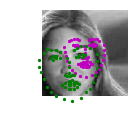

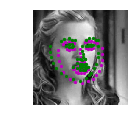

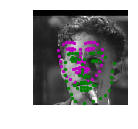

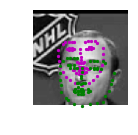

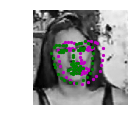

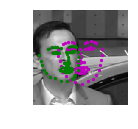

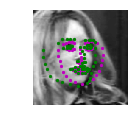

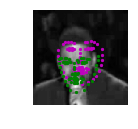

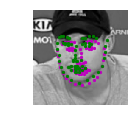

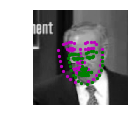

In [17]:
## TODO: visualize your test output
# you can use the same function as before, by un-commenting the line below:

visualize_output(test_images, test_outputs, gt_pts)


Once you've found a good model (or two), save your model so you can load it and use it later!

Save your models but please **delete any checkpoints and saved models before you submit your project** otherwise your workspace may be too large to submit.

In [18]:
## TODO: change the name to something uniqe for each new model
model_dir = 'saved_models/'
model_name = 'keypoints_model_20_epochs.pt'

# after training, save your model parameters in the dir 'saved_models'
torch.save(net.state_dict(), model_dir+model_name)

After you've trained a well-performing model, answer the following questions so that we have some insight into your training and architecture selection process. Answering all questions is required to pass this project.

### Question 1: What optimization and loss functions did you choose and why?


**Answer**: First I went with Stochastic Gradient Descent but then I switched to Adam Optimizer as the results improved with it. I selected L1 Loss (or MAE) as the Loss Function because it measures the mean absolute error (MAE) between each element in the input  and target y .

### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

**Answer**: I added more Convolutional Layers because of the size of the input images. Instead of making the images too small before feeding it to the model, I added more Convolution Layers to capture more information as well as added more Pooling Layers to reduce the image size. I went with a larger Hidden Layer as well to better train the model given the input.

### Question 3: How did you decide on the number of epochs and batch_size to train your model?

**Answer**: At first I went with a large number of Epochs but then reduced them to 20 as the expectations were being met.

## Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, you can see how to extract a single filter (by index) from your first convolutional layer. The filter should appear as a grayscale grid.

[[ 0.02831589 -0.06352376  0.10424802  0.15095232  0.14549877]
 [ 0.15601237  0.02283475 -0.12247265  0.0694574  -0.12055037]
 [-0.00485971 -0.03910261  0.04319903 -0.10479739 -0.12232868]
 [-0.19469731 -0.02678665  0.06703947 -0.13876779 -0.09390002]
 [ 0.10947718 -0.15995905  0.08411576  0.11120249 -0.00160136]]
(5, 5)


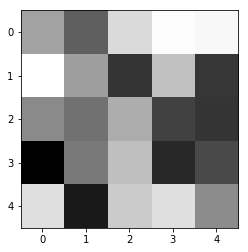

In [19]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
weights1 = net.conv1.weight.data

w = weights1.numpy()

filter_index = 0

print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
plt.imshow(w[filter_index][0], cmap='gray')


## Feature maps

Each CNN has at least one convolutional layer that is composed of stacked filters (also known as convolutional kernels). As a CNN trains, it learns what weights to include in it's convolutional kernels and when these kernels are applied to some input image, they produce a set of **feature maps**. So, feature maps are just sets of filtered images; they are the images produced by applying a convolutional kernel to an input image. These maps show us the features that the different layers of the neural network learn to extract. For example, you might imagine a convolutional kernel that detects the vertical edges of a face or another one that detects the corners of eyes. You can see what kind of features each of these kernels detects by applying them to an image. One such example is shown below; from the way it brings out the lines in an the image, you might characterize this as an edge detection filter.

<img src='images/feature_map_ex.png' width=50% height=50%/>


Next, choose a test image and filter it with one of the convolutional kernels in your trained CNN; look at the filtered output to get an idea what that particular kernel detects.

### TODO: Filter an image to see the effect of a convolutional kernel
---

[[ 0.03601707 -0.01370908 -0.02373415 -0.16926757 -0.06051279]
 [-0.07943267 -0.12423977 -0.1688742  -0.19079997 -0.14278406]
 [-0.0245236   0.18724243  0.00261639  0.03269174 -0.06726648]
 [ 0.024039    0.03922533  0.11120327  0.10737325 -0.0349079 ]
 [-0.01781231  0.19361389  0.02418457  0.10777757  0.13653205]]
(5, 5)


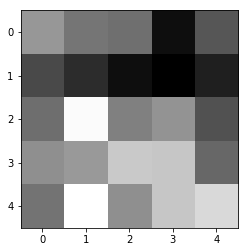

In [28]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
weights1 = net.conv1.weight.data

w = weights1.numpy()

filter_index = 8

print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
plt.imshow(w[filter_index][0], cmap='gray')


In [29]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

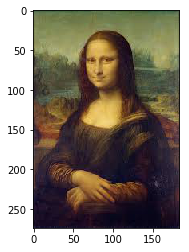

In [30]:
##TODO: load in and display any image from the transformed test dataset
img = cv2.imread('./images/mona_lisa.jpg') # the_beatles
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

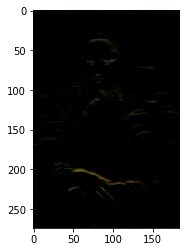

In [31]:
## TODO: Using cv's filter2D function,
## apply a specific set of filter weights (like the one displayed above) to the test image

new_img = cv2.filter2D(img, -1, w[filter_index][0])
plt.imshow(new_img)

### Question 4: Choose one filter from your trained CNN and apply it to a test image; what purpose do you think it plays? What kind of feature do you think it detects?


**Answer**: It seems to detect and highlight edges.

---
## Moving on!

Now that you've defined and trained your model (and saved the best model), you are ready to move on to the last notebook, which combines a face detector with your saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!